# Examples

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Data-fitting 

Given a signal $f \in \mathbb{R}^m$ we want to fit a model
$$f_i = \sum_{j=1}^n u_j\exp(-\beta(x_i - x_j)^2).$$
Typically, $m>n$ in such applications as we are looking for a *simple* explanation of the signal.


In [2]:
m = 51
n = 10

# nodes
x = np.linspace(0,1,m)
xi = np.linspace(0,1,n)

# sample
noise = np.random.randn(m)
f = np.cos(15*x) + .5*noise

# matrix
K = np.zeros((m,n))
for k in range(n):
    K[:,k] = np.exp(-100*(x - xi[k])**2)
    

Text(0.5,1,'right singular vector')

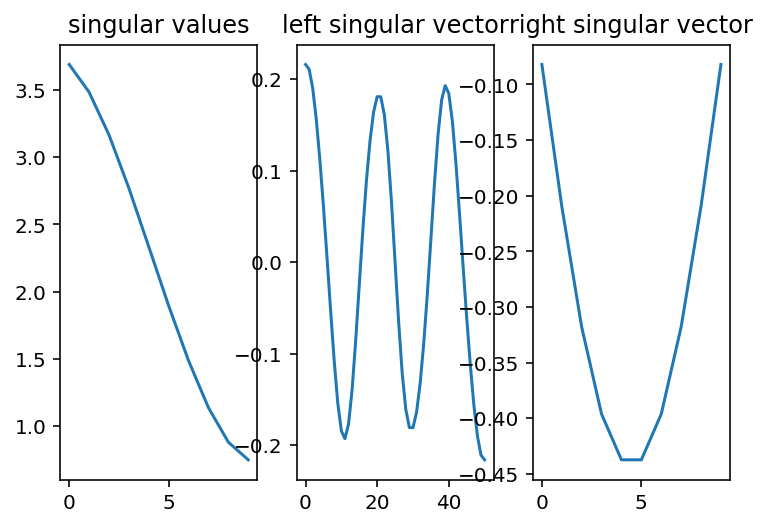

In [6]:
# SVD
U, S, V = np.linalg.svd(K)

plt.subplot(131)
plt.plot(S)
plt.title('singular values')

plt.subplot(132)
plt.plot(U[:,5])
plt.title('left singular vector')

plt.subplot(133)
plt.plot(V[0,:])
plt.title('right singular vector')


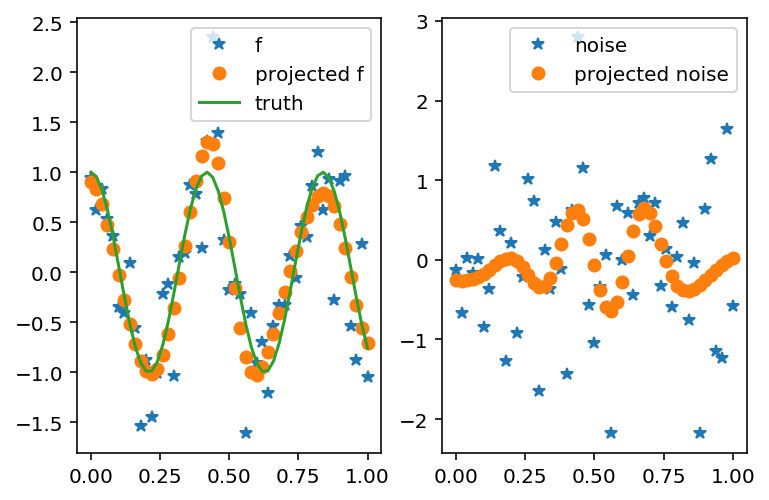

In [7]:
# project f on range of K

plt.subplot(121)
plt.plot(x,f,'*',x,U[:,0:n]@U[:,0:n].T@f,'o',x,np.cos(15*x))
plt.legend(('f','projected f','truth'))

plt.subplot(122)
plt.plot(x,noise,'*',x,U[:,0:n]@U[:,0:n].T@noise,'o')
plt.legend(('noise','projected noise'))

<function matplotlib.pyplot.show>

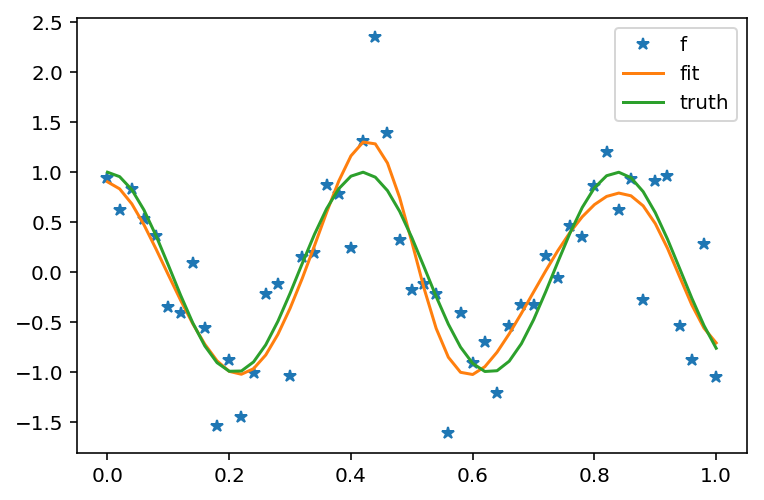

In [8]:
# solve
u = np.linalg.lstsq(K,f)[0]

plt.plot(x,f,'*')
plt.plot(x,K@u,x,np.cos(15*x))
plt.legend(('f','fit','truth'))
plt.show

## Convolution

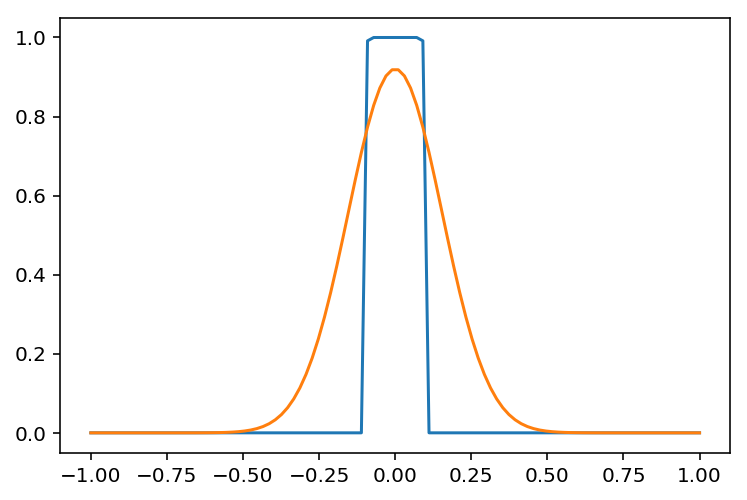

In [9]:
# set up matrix
n = 100
t = np.linspace(0,1,n)
K = la.toeplitz(np.exp(-100*t**2)/(10))

# data
x = np.linspace(-1,1,n)
u = np.exp(-(10*x)**50)
f = K@u
noise = 0.1*np.random.randn(n)

# plot
plt.plot(x,u,x,f)

Text(0.5,1,'right singular vectors')

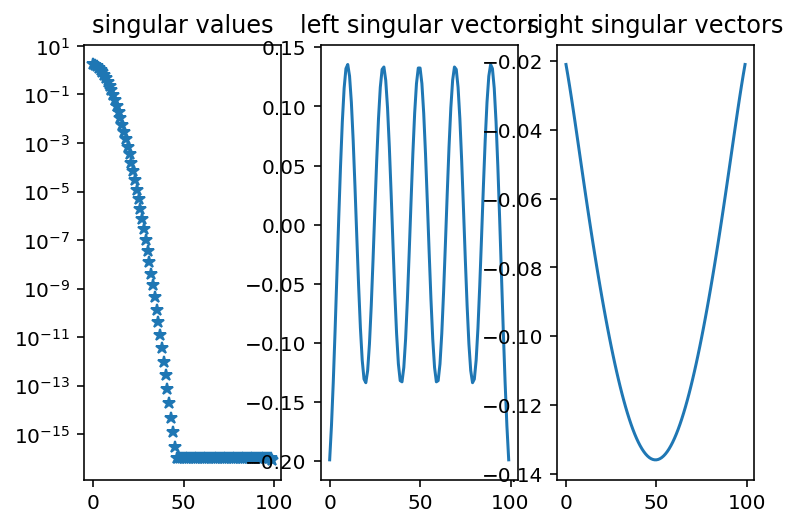

In [12]:
# SVD
U, S, V = np.linalg.svd(K)

plt.subplot(131)
plt.semilogy(S,'*')
plt.title('singular values')

plt.subplot(132)
plt.plot(U[:,10])
plt.title('left singular vectors')

plt.subplot(133)
plt.plot(V[0,:])
plt.title('right singular vectors')


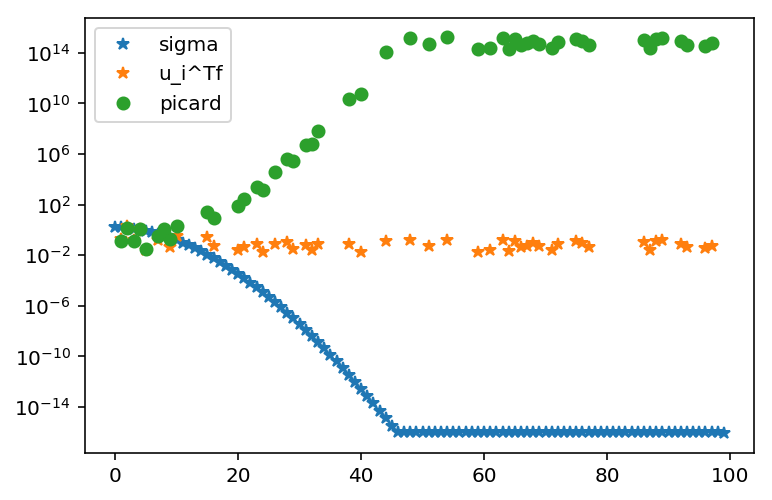

In [13]:
# noise
plt.semilogy(S,'*')
plt.semilogy(U.T@(f+noise),'*')
plt.semilogy((U.T@(f+noise))/S,'o')
plt.legend(('sigma','u_i^Tf','picard'))

[0, 99, 1e-16, 1e+16]

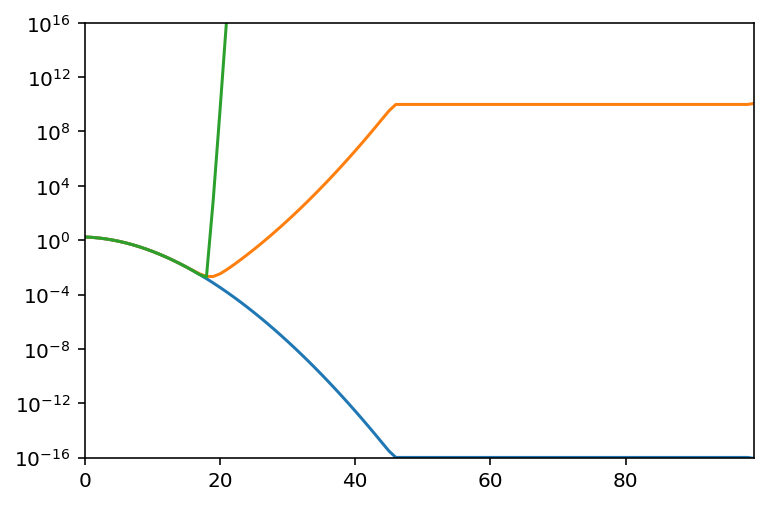

In [14]:
# regularized inverse
plt.semilogy(S)
plt.semilogy((S**2 + 1e-6)/S)
plt.semilogy(S + (1e-3/S)**20)
plt.axis([0,99,1e-16,1e16])

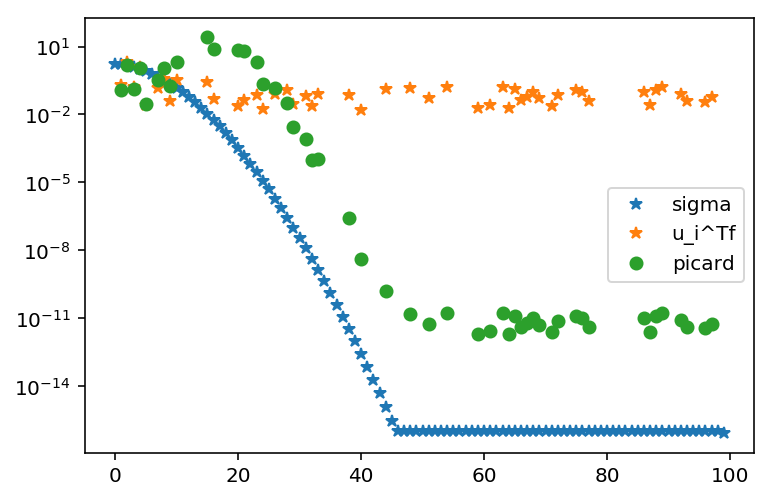

In [15]:
# noise
plt.semilogy(S,'*')
plt.semilogy(U.T@(f+noise),'*')
plt.semilogy((U.T@(f+noise))*S/(S**2 + 1e-6),'o')
plt.legend(('sigma','u_i^Tf','picard'))

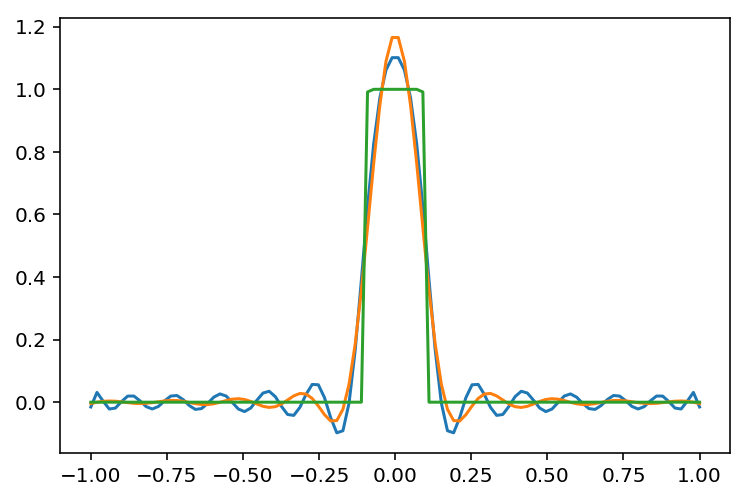

In [16]:
# regularized inverse
k = 30
alpha = 1e-7
u1 = (V[0:k,:].T@np.diag(1/S[0:k])@U[:,0:k].T)@f
u2 = (V[0:n,:].T@np.diag(S/(S**2 + alpha))@U[:,0:n].T)@f
plt.plot(x,u1,x,u2,x,u)

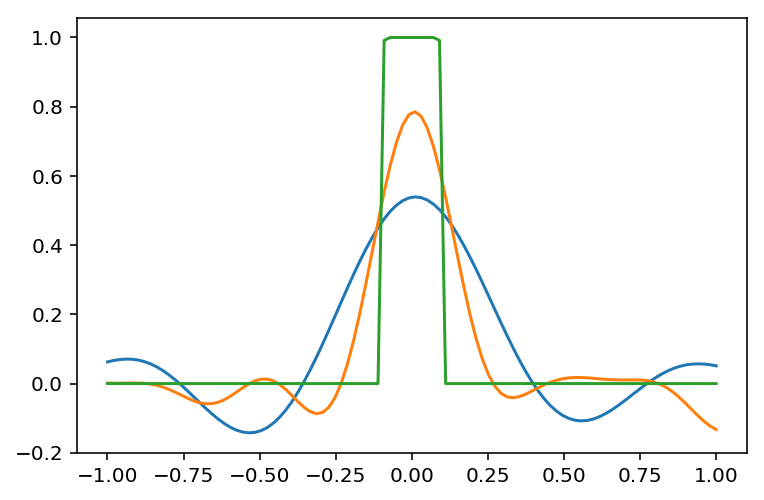

In [17]:
# noisy data
k = 5
alpha = 1e-1
u1 = (V[0:k,:].T@np.diag(1/S[0:k])@U[:,0:k].T)@(f+noise)
u2 = (V[0:n,:].T@np.diag(S/(S**2 + alpha))@U[:,0:n].T)@(f+noise)

plt.plot(x,u1,x,u2,x,u)

## Tomography

In [18]:
n = 100
m = 10
x = np.linspace(0,1,n)
zi = [10, 12, 21, 26, 35, 47, 63, 78, 81,99]

# matrix
K = np.zeros((m,n))
for k in range(m):
    K[k,0:zi[k]] = 1

# data
u = x + .5*x*np.sin(5*x)
noise = 0.1*np.random.randn(m)
f = K@u

Text(0.5,1,'right singular vectors')

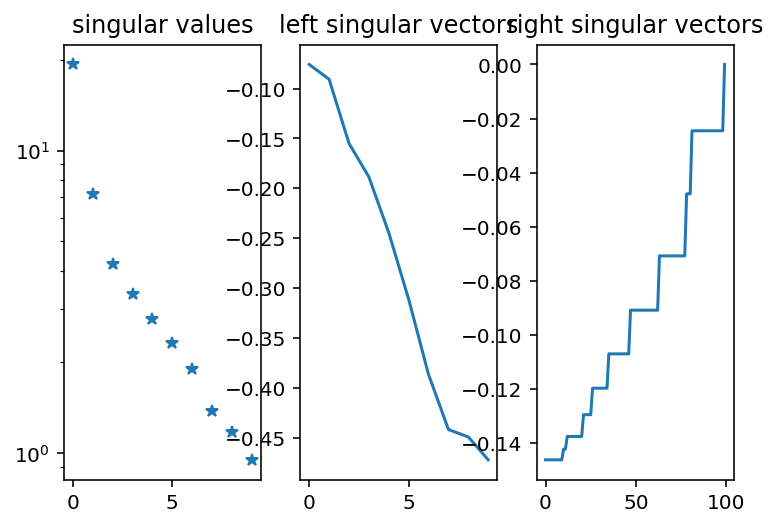

In [216]:
# SVD
U, S, V = np.linalg.svd(K)

plt.subplot(131)
plt.semilogy(S,'*')
plt.title('singular values')

plt.subplot(132)
plt.plot(U[:,0])
plt.title('left singular vectors')

plt.subplot(133)
plt.plot(V[0,:])
plt.title('right singular vectors')


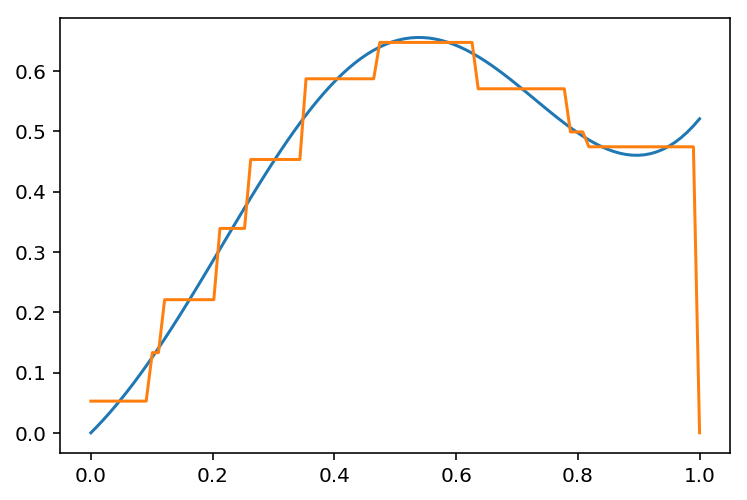

In [227]:
# project ground truth on row-space
plt.plot(x,u,x,u-V[m:,:].T@V[m:,:]@u)

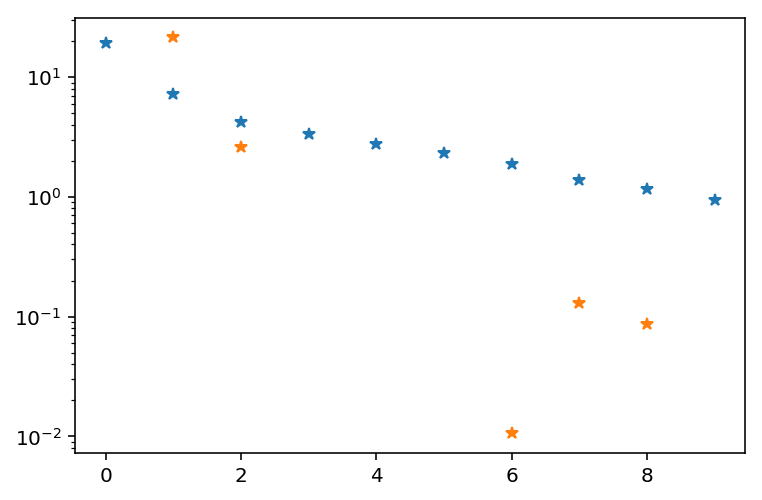

In [228]:
# noise
plt.semilogy(S,'*')
plt.semilogy(U.T@(f+noise),'*')

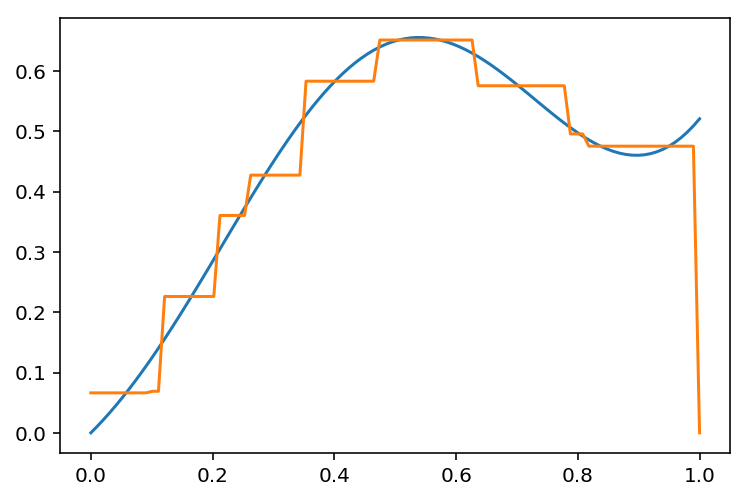

In [230]:
# minimum norm solution
u1 = (V[0:m,:].T@np.diag(1/S[0:m])@U[:,0:m].T)@(f+noise)

plt.plot(x,u,x,u1)

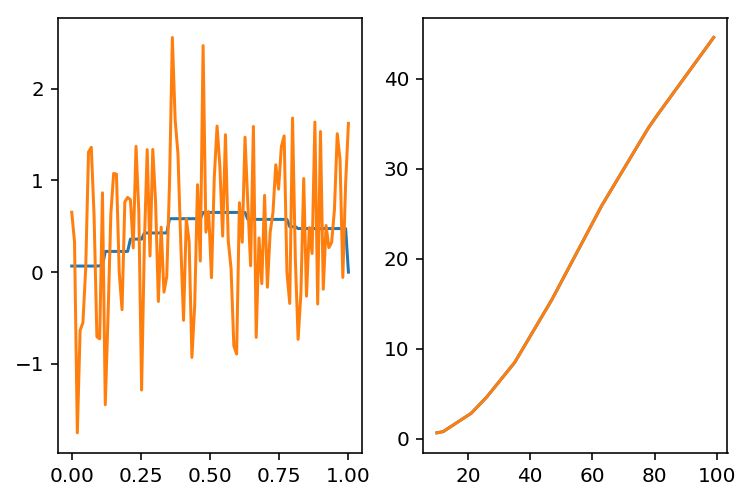

In [236]:
# many solutions!
u2 = u1 + V[m:,:].T@np.random.randn(n-m)
plt.subplot(121)
plt.plot(x,u1,x,u2)
plt.subplot(122)
plt.plot(zi,K@u1,zi,K@u2)